<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1
*First carry out Exercise 2.8 of the textbook with their ZIP-code data and then replicate the process the best you manage to some data from you own problem that was established in the first homework.*

Los datos utilizados en este cuaderno están disponibles aquí: [Datasets](https://drive.google.com/drive/folders/159GnBJQDxTY9oYqPBZzdNghyb4Gd9pDS?usp=sharing) 


In [21]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


## **Regresión líneal**
A continuación usaremos un modelo de regresión líneal para resolver el problema de ZIP-code [2,3] del libro [liga](https://link.springer.com/book/10.1007/978-0-387-84858-7).

Iniciamos cargando los datos de entrenamiento de los códigos postales 2 y 3 en los arreglos $X$ y $Y$:

In [10]:
df1 = pd.read_csv('zip_train.csv', header=None)
n = [2,3]
df1 = df1.loc[ df1.iloc[:,0].isin(n)]
df2 = df1.iloc[:,0]
df1 = df1.drop([0],axis=1)
X  = df1.to_numpy() ## Características
Y  = df2.to_numpy() ## Etiquetas

Ahora, cargamos los datos de prueba en los arreglos $Xt$ y $Yt$:

In [11]:
df1 = pd.read_csv('zip_test.csv', header=None)
df1 = df1.loc[df1.iloc[:,0].isin(n)]
df2 = df1.iloc[:,0]
df1 = df1.drop([0],axis=1)
Xt  = df1.to_numpy()
Yt  = df2.to_numpy()

A continuación, obtenemos un modelo de predicción de los datos de entrenamiento usando regresión lineal. Posteriomente, calculamos los errores entre la predicción $y\_pred$ y los datos de entrenamiento "Y". Los errores de la predicción con datos de entrenamiento son representados por un histograma.

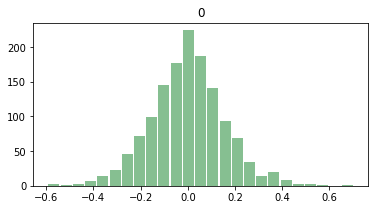

In [12]:
model = LinearRegression().fit(X, Y) #https://realpython.com/linear-regression-in-python/
y_pred = model.predict(X)
error = Y - y_pred
dfx = pd.DataFrame(error,Y)
dfx.to_csv('error.csv')
plt = dfx.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#86bf91', zorder=2, rwidth=0.9)
err_regress = mean_absolute_error(Y,y_pred)

Ahora, utilizamos el modelo obtenido con los datos de entrenamiento para predecir los datos de prueba. Además,  calculamos los errores entre la predicción $y\_pred2$ y los datos de prueba $Yt$. Los errores de la predicción con datos de prueba son representados por un histograma.

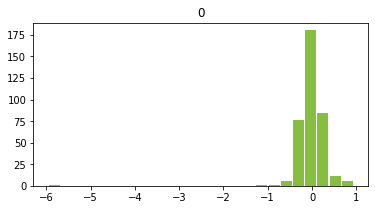

In [13]:
y_pred2 = model.predict(Xt)
error2 = Yt - y_pred2
df = pd.DataFrame(error2,Yt)
df.to_csv('error2.csv')
plt = df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#86bf40', zorder=2, rwidth=0.9)
err_regress_t = mean_absolute_error(Yt,y_pred2)

Por último calculamos el **error absoluto medio (MAE)** de los datos de entrenamiento así como de los datos de prueba.

In [14]:
print("MAE del modelo de regresión con datos de entrenamiento:", err_regress)
print("MAE del modelo de regresión con datos de prueba:", err_regress_t) 

MAE del modelo de regresión con datos de entrenamiento: 0.12054534466534834
MAE del modelo de regresión con datos de prueba: 0.1911427954737535


## **k-nearest neighbors**
A continuación usaremos un modelo de k-NN para resolver el problema de ZIP-code [2,3] del libro [liga](https://link.springer.com/book/10.1007/978-0-387-84858-7).

Usaremos los arreglos $mae\_knn$ y $mae\_knn\_y$ para guardar los resultados del error de predicción de cada modelo de K-NN con parámetro $k$.

In [15]:
k_list    = [1, 3, 5, 7, 15] ## Lista de parámetros k
mae_knn   = []  ## Guarda valores de error de diferentes k en datos de entrenamiento
mae_knn_t = []  ## Guarda valores de error de diferentes k en datos de prueba

Para cada $k$ se obtiene un modelo K-NN con los que se calculan el **error absoluto medio (MAE)** para los datos de entrenamiento $X$ como de prueba $Xt$.

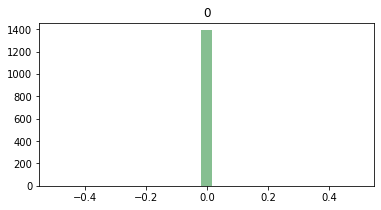

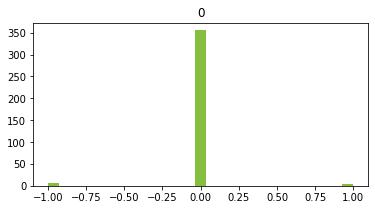

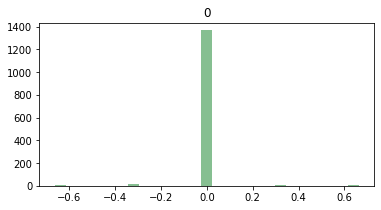

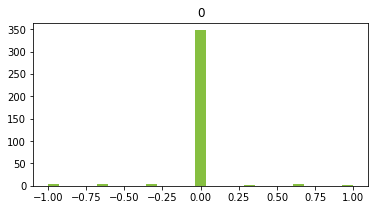

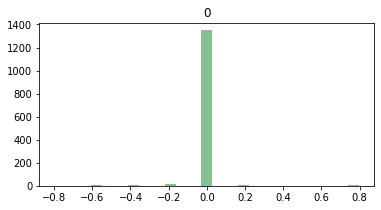

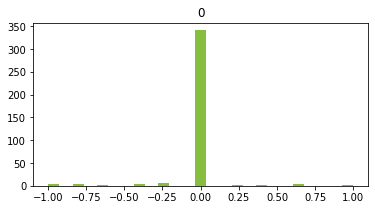

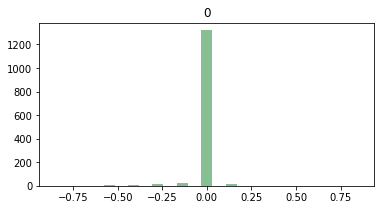

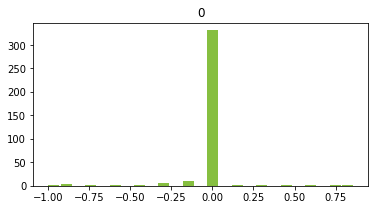

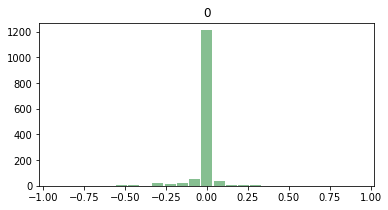

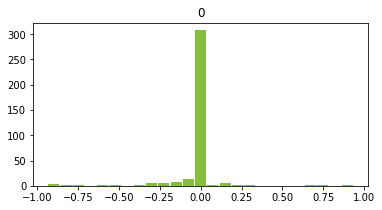

In [16]:
for k in k_list:
    #https://realpython.com/knn-python/#:~:text=The%20kNN%20algorithm%20is%20a,in%20Python%3A%20A%20Practical%20Guide.
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, Y)
    y_pred   = model.predict(X) 
    y_predt   = model.predict(Xt)
    mae_knn.append(mean_absolute_error(Y,y_pred))
    mae_knn_t.append(mean_absolute_error(Yt,y_predt))
    error = Y - y_pred
    errort = Yt - y_predt
    ## Líneas de código que imprimen los histogramas de los errores de cada modelo con un parámetro k.
    df = pd.DataFrame(error,Y)
    plt = df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#86bf91', zorder=2, rwidth=0.9)    
    dft = pd.DataFrame(errort,Yt)
    plt2 = dft.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#86bf40', zorder=2, rwidth=0.9)

Por último mostramos el **error absoluto medio (MAE)** de los datos de entrenamiento así como de los datos de prueba del modelo K-NN para cada parámetro $k$.

In [17]:
print("MAE del modelo de KNN con datos de entrenamiento:", mae_knn)
print("MAE del modelo de KNN con datos de prueba:", mae_knn_t)

MAE del modelo de KNN con datos de entrenamiento: [0.0, 0.007199424046076315, 0.010079193664506842, 0.013370358942713153, 0.023710103191744672]
MAE del modelo de KNN con datos de prueba: [0.024725274725274724, 0.03021978021978022, 0.03296703296703297, 0.03767660910518054, 0.04761904761904762]


In [18]:
mae_reg = []
mae_reg_t = []
for k in k_list:
  mae_reg.append(err_regress)
  mae_reg_t.append(err_regress_t)

Finalmente, comparamos graficamente los errores en la clasificación de ZIP-code entre modelo de regresión lineal y el K-NN con diferentes valores de $k$.

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

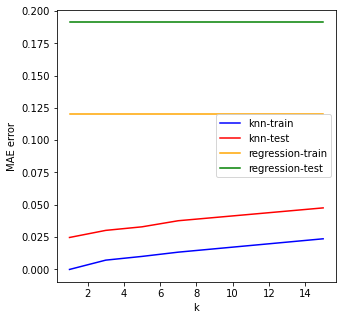

In [23]:
fig = plt.figure(figsize = (5, 5))
axes = fig.add_subplot(1, 1, 1)
axes.plot(k_list, mae_knn,   '-', color = 'blue'  , label = 'knn-train')
axes.plot(k_list, mae_knn_t, '-', color = 'red'   , label = 'knn-test')
axes.plot(k_list, mae_reg,   '-', color = 'orange', label = 'regression-train')
axes.plot(k_list, mae_reg_t, '-', color = 'green' , label = 'regression-test')
axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("MAE error")
plt.show()

## **Estimación de pérdidas eléctricas en regiones con técnicas de  regresión líneal y k-NN**

Los datos que se usarán en este ejercicio son resultados de la planeación de la operación eléctrica del sistema eléctrico interconectado en México que consta de 320 instancias.
Las columnas de los datos son los resultados por región y por hora del día. Se dan resultados de generación térmica (GenTer), generación hidráulica (GenHid), generación renovable (GenRE), Gneración no programable (GenNP), Generación total (GenTot), demanda de la región (Demanda), Cortes de energía (Corte), Excedentes de energía(Excedente),Potencia (PotInt), precio Marginal y pérdidas de la región.

Una parte importante del proyecto de tesis es la estimación de pérdidas eléctricas en la red agregando restricciones al modelo MILP de programación de las unidades.

¿Es posible determinar un modelo lineal de regresión o k-NN que estime las pérdidas en función de la generación y demanda conocidas?

¿Puede agregarse este modelo de estimación de pérdidas al modelo MILP a manera de restricciónes para acelerar el proceso de convergencia?

Iniciamos cargando los datos de entrenamiento y de prueba.

In [24]:
#Carga de datos de entrenamiento
df1 = pd.read_csv('r_Regiones_100s_train.csv')
df2 = df1['Perdidas']
df1 = df1[['GenTer','GenRE','GenNP','Demanda','Corte','Excedente']]
X  = df1.to_numpy() ## Resultados por región e intervalo
Y  = df2.to_numpy() ## Pérdidas eléctricas en MW

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
#Carga de datos de prueba
df1 = pd.read_csv('r_Regiones_40s_test.csv')
df2 = df1['Perdidas']
df1 = df1[['GenTer','GenRE','GenNP','Demanda','Corte','Excedente']]
Xt  = df1.to_numpy() ## Resultados por región e intervalo
Yt  = df2.to_numpy() ## Pérdidas eléctricas en MW

A continuación, obtenemos un modelo de predicción de los datos de entrenamiento usando regresión lineal. Posteriomente, calculamos los errores entre la predicción $y\_pred$ y los datos de entrenamiento "Y". Los errores de la predicción con datos de entrenamiento son representados por un histograma.

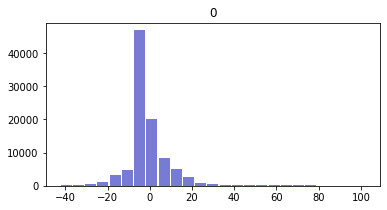

In [26]:
model = LinearRegression().fit(X, Y) #https://realpython.com/linear-regression-in-python/
y_pred = model.predict(X)
error = Y - y_pred
dfx = pd.DataFrame(error,Y)
plt = dfx.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#777bd4', zorder=2, rwidth=0.9)
err_regress = mean_absolute_error(Y,y_pred)

Ahora, utilizamos el modelo obtenido con los datos de entrenamiento para predecir los datos de prueba. Además,  calculamos los errores entre la predicción $y\_pred2$ y los datos de prueba $Yt$. Los errores de la predicción con datos de prueba son representados por un histograma.

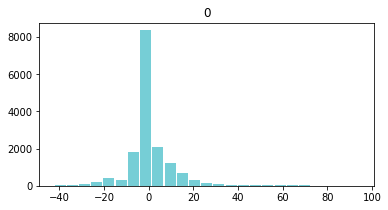

In [27]:
y_pred2 = model.predict(Xt)
error2 = Yt - y_pred2
df = pd.DataFrame(error2,Yt)
plt = df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#76ced6', zorder=2, rwidth=0.9)
err_regress_t = mean_absolute_error(Yt,y_pred2)

In [28]:
print("MAE del modelo de regresión con datos de entrenamiento:", err_regress)
print("MAE del modelo de regresión con datos de prueba:", err_regress_t) 

MAE del modelo de regresión con datos de entrenamiento: 7.026442166536972
MAE del modelo de regresión con datos de prueba: 6.884672570413969


##**Estimación de pérdidas eléctricas con k-NN**
Usaremos los arreglos $mae\_knn$ y $mae\_knn\_y$ para guardar los resultados del error de predicción de cada modelo de K-NN con parámetro $k$.

In [29]:
k_list    = [1, 3, 5, 7, 15] ## Lista de parámetros k
mae_knn   = []               ## Guarda valores de error de diferentes k en datos de entrenamiento
mae_knn_t = []               ## Guarda valores de error de diferentes k en datos de prueba

Para cada $k$ se obtiene un modelo K-NN con los que se calculan el **error absoluto medio (MAE)** para los datos de entrenamiento $X$ como de prueba $Xt$.

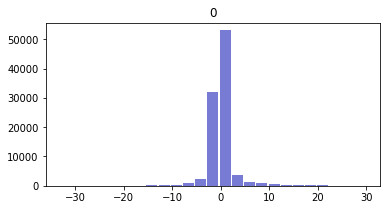

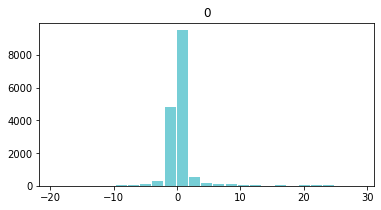

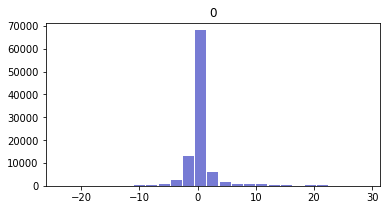

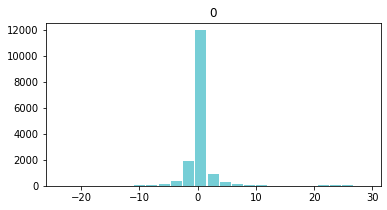

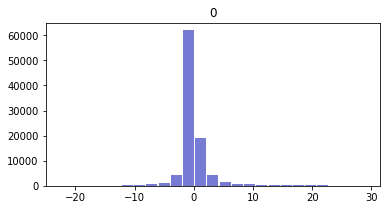

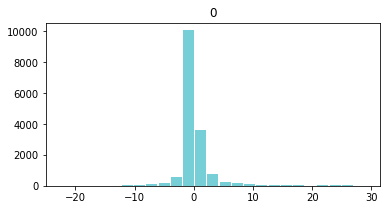

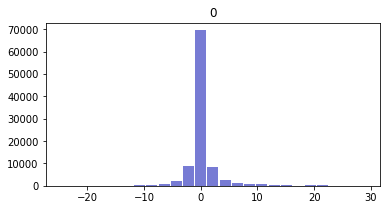

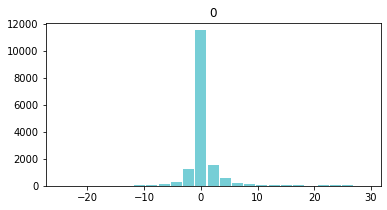

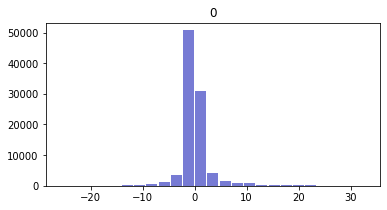

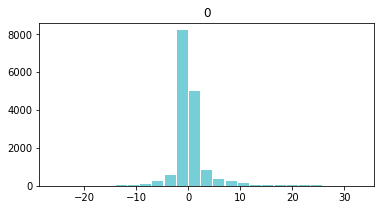

In [30]:
for k in k_list:
    #https://realpython.com/knn-python/#:~:text=The%20kNN%20algorithm%20is%20a,in%20Python%3A%20A%20Practical%20Guide.
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, Y)
    y_pred   = model.predict(X) 
    y_predt   = model.predict(Xt)
    mae_knn.append(mean_absolute_error(Y,y_pred))
    mae_knn_t.append(mean_absolute_error(Yt,y_predt))
    error = Y - y_pred
    errort = Yt - y_predt
    ## Líneas de código que imprimen los histogramas de los errores de cada modelo con un parámetro k.
    df = pd.DataFrame(error,Y)
    plt = df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#777bd4', zorder=2, rwidth=0.9)    
    dft = pd.DataFrame(errort,Yt)
    plt2 = dft.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#76ced6', zorder=2, rwidth=0.9)

Por último mostramos el **error absoluto medio (MAE)** de los datos de entrenamiento así como de los datos de prueba del modelo K-NN para cada parámetro $k$.

In [34]:
print("MAE del modelo de KNN con datos de entrenamiento:", mae_knn)
print("MAE del modelo de KNN con datos de prueba:", mae_knn_t)

MAE del modelo de KNN con datos de entrenamiento: [1.324293221393035, 1.2696310737976781, 1.2798165319237147, 1.2984168932125089, 1.4456673618021008]
MAE del modelo de KNN con datos de prueba: [1.041209328358209, 1.1468778399668327, 1.261364552238806, 1.3769853500355365, 1.7017916542288556]


In [35]:
mae_reg = []
mae_reg_t = []
for k in k_list:
  mae_reg.append(err_regress)
  mae_reg_t.append(err_regress_t)

Finalmente comparamos los errores en la clasificación de ZIP-code del modelo de regresión lineal contra el de K-NN con diferentes valores de $k$.

In [37]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

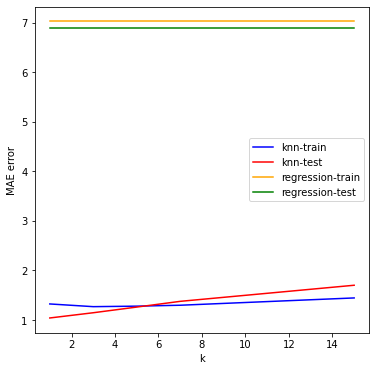

In [38]:
fig = plt.figure(figsize = (6, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(k_list, mae_knn,   '-', color = 'blue'  , label = 'knn-train')
axes.plot(k_list, mae_knn_t, '-', color = 'red'   , label = 'knn-test')
axes.plot(k_list, mae_reg,   '-', color = 'orange', label = 'regression-train')
axes.plot(k_list, mae_reg_t, '-', color = 'green' , label = 'regression-test')
axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("MAE error")
plt.show()